# 2️⃣  Two-Sample Independent t-Test | Independent Samples t-Test
This hypothesis is used to test the comparison between the averages of two independent groups.

**Hypotheses**

$H0 : \mu_1 = \mu_2 \quad|\quad H1 : \mu_1 \neq \mu_2$

$H0 : \mu_1 >= \mu_2 \quad |\quad H_1 : \mu_1 < \mu_2$

$H0 : \mu_1 <= \mu_2 \quad |\quad H_1 : \mu_1 > \mu_2$


**Test Statistics (three cases):**

1. **Equal variances, equal sample sizes ($n_1 = n_2$):**

   $t = \frac{\bar{X}_1 - \bar{X}_2}{s_p \sqrt{\frac{2}{n}}}$


   with the pooled variance estimate:  
   $s_p = \sqrt{\frac{s_1^2 + s_2^2}{2}}$

3. **Equal variances, unequal sample sizes ($n_1 \neq n_2$):**

   $t = \frac{\bar{X}_1 - \bar{X}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$

   with the pooled variance estimate:  
   $s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}$

4. **Unequal variances (Welch’s t-test):**

   $t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$


- $\bar{X}_1, \bar{X}_2$: Sample means  
- $s_1^2, s_2^2$: Sample variances  
- $n_1, n_2$: Sample sizes  
- $s_p^2$: Pooled variance estimate  

**Assumptions:**
- Normality: Each group is approximately normally distributed.    
- Homogeneity of variances: Required for pooled $t$-test (cases 1 and 2).  
  - If this assumption is violated → use Welch’s test (case 3).  

---


**Problem**: A system has been integrated with machine learning. The system before machine learning is A, and the new system is B. They want us to test whether there is a revenue difference between systems A and B after the prediction is generated.

#### » Import required data liblaries and create arrays to simulate groups

In [82]:
import pandas as pd
import numpy as np
group_A = pd.DataFrame(np.random.randint(19,36,30))
group_B = pd.DataFrame(np.random.randint(19,40,30))

### ! Data is generally provided in two types:

#### Data Type 1

In [83]:
groups = pd.concat([group_A, group_B], axis=1)
groups.columns = ["A","B"]
groups.head()

,A,B
0,27,30
1,33,32
2,30,32
3,27,19
4,21,35


#### Data Type 2

In [84]:
groupA = pd.DataFrame(np.arange(len(group_A)))
groupA[groupA.columns] = "A"
A = pd.concat([group_A, groupA],axis=1)

groupB = pd.DataFrame(np.arange(len(group_B)))
groupB[groupB.columns] = "B"
B = pd.concat([group_B, groupB],axis=1)

AB = pd.concat([A,B])
AB.columns = ["income", "group"]
AB.head()

,income,group
0,27,A
1,33,A
2,30,A
3,27,A
4,21,A


In [85]:
AB.tail()

,income,group
25,32,B
26,22,B
27,34,B
28,33,B
29,26,B


#### » Visualize the data with boxplot to see the overall observation

<Axes: >

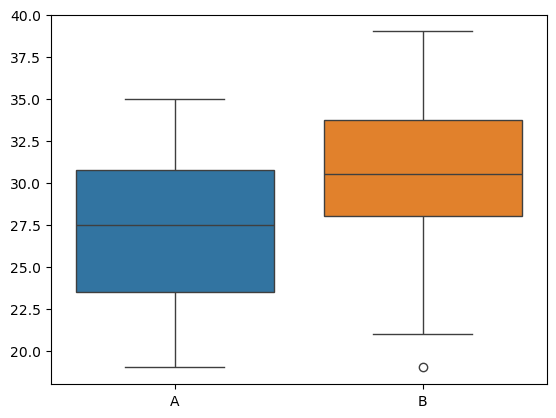

In [86]:
import seaborn as sns
sns.boxplot(groups)

### Normality Assumption
##### H0: There is no difference between the sample distribution and the theoretical normal distribution.(Normally distributed)
##### H1: There is "

In [87]:
from scipy.stats import shapiro
shapiro(groups.A)

ShapiroResult(statistic=np.float64(0.9429535878105091), pvalue=np.float64(0.10925541383560197))

In [88]:
shapiro(groups.B)

ShapiroResult(statistic=np.float64(0.9677906692362914), pvalue=np.float64(0.480629509405764))

Based on the results above, both A and B group's p values are greater than 0.05 so H0 can not rejected. All groups distributed normally, the assumption has been confirmed.

### Variance Homogenity Assumption
##### H0: Variances are homogen
##### H1: Variances is not homogen

In [89]:
from scipy.stats import levene
levene(groups.A, groups.B)

LeveneResult(statistic=np.float64(0.018068535825545205), pvalue=np.float64(0.8935364274167643))

Based on the results above, since the pvalue is greater than 0.05, H0 can not rejected. The assumption has been confirmed.

### Hypothesis Test
##### $H0 : \mu_1 = \mu_2$ (There is no difference between old system(A) and new system(B))
##### $H1 : \mu_1 \neq \mu_2$ (There is ..)

In [90]:
from scipy.stats import ttest_ind
ttest_ind(groups["A"], groups["B"], equal_var=True)

TtestResult(statistic=np.float64(-2.4256037230694862), pvalue=np.float64(0.018415473346688513), df=np.float64(58.0))

Based on the results above, since the pvalue lower than 0.05, H0 is rejected and thats mean There is the difference between systems and we can say that the new system(B) is more useful by looking the boxplot graphs because on that graph the B's box is higher.

### ! If assumptions hadn't been confirmed, Non-parametric Two Sample Independent Test would have been used. 

#### » Import "mannwhitneyu" which used for a non-parametric two sample independent test

In [91]:
from scipy.stats import mannwhitneyu
mannwhitneyu(groups["A"], groups["B"])

MannwhitneyuResult(statistic=np.float64(291.5), pvalue=np.float64(0.01920599030707209))